## Note

before start doing this project, I try to find the same project to help me preprocess the data from PTB

so I take some project insight from this 
- https://github.com/martiansideofthemoon/ecg-analysis 
- https://github.com/Nospoko/qrs-tutorial. 
- https://github.com/MIT-LCP/wfdb-python

Thank you for helping me by sharing your project

In [150]:
import wfdb
import pywt
from wfdb import processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, dct
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


## Preprocessing Process

In [83]:
with open('/Users/adamwidibagaskarta/AnacondaProjects/Final Project - Biomedical Programming/CAD.txt', 'r') as f:
    records = f.read().split()

In [84]:
chid = 14
howmany = 5000
db6 = pywt.Wavelet('db6')
min_bpm = 20
max_bpm = 230
MI_beat = []

In [5]:
def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

0 / 11 NORMAL
Corrected gqrs detected peak indices: [143, 226, 308, 475, 558, 640, 802, 882, 963, 1043, 1122, 1202, 1282, 1446, 1526, 1686, 1765, 1924, 2003, 2083, 2164, 2247, 2330, 2414, 2498, 2583, 2755, 2840, 2925, 3009, 3092, 3175, 3257, 3340, 3422, 3503, 3585, 3585, 3747, 3827, 3908, 3988, 4067, 4146, 4225, 4388, 4467, 4545, 4624, 4779, 4857, 4998]


/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/wfdb/processing/hr.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  hr = 60000.0 / rr


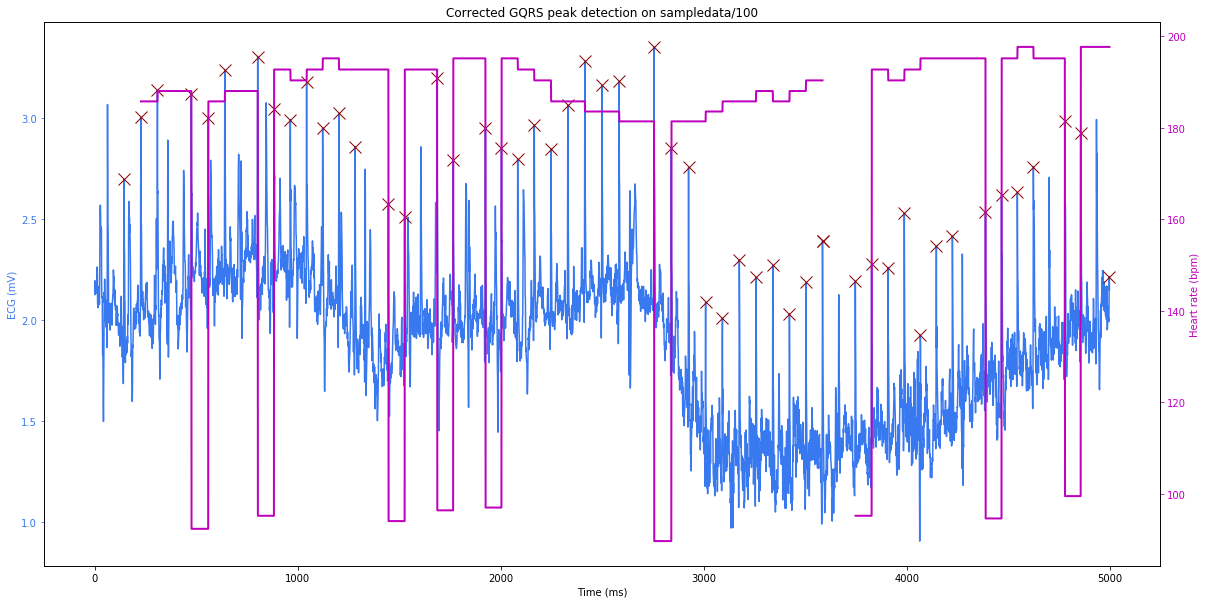

1 / 11 NORMAL
Corrected gqrs detected peak indices: [101, 192, 298, 378, 471, 564, 658, 763, 846, 937, 1030, 1120, 1212, 1316, 1397, 1487, 1575, 1665, 1752, 1933, 2023, 2111, 2197, 2284, 2371, 2460, 2548, 2637, 2729, 2821, 2915, 2915, 3104, 3198, 3295, 3390, 3494, 3583, 3678, 3772, 3868, 3971, 4057, 4150, 4243, 4335, 4426, 4530, 4613, 4704, 4795, 4885, 4975]


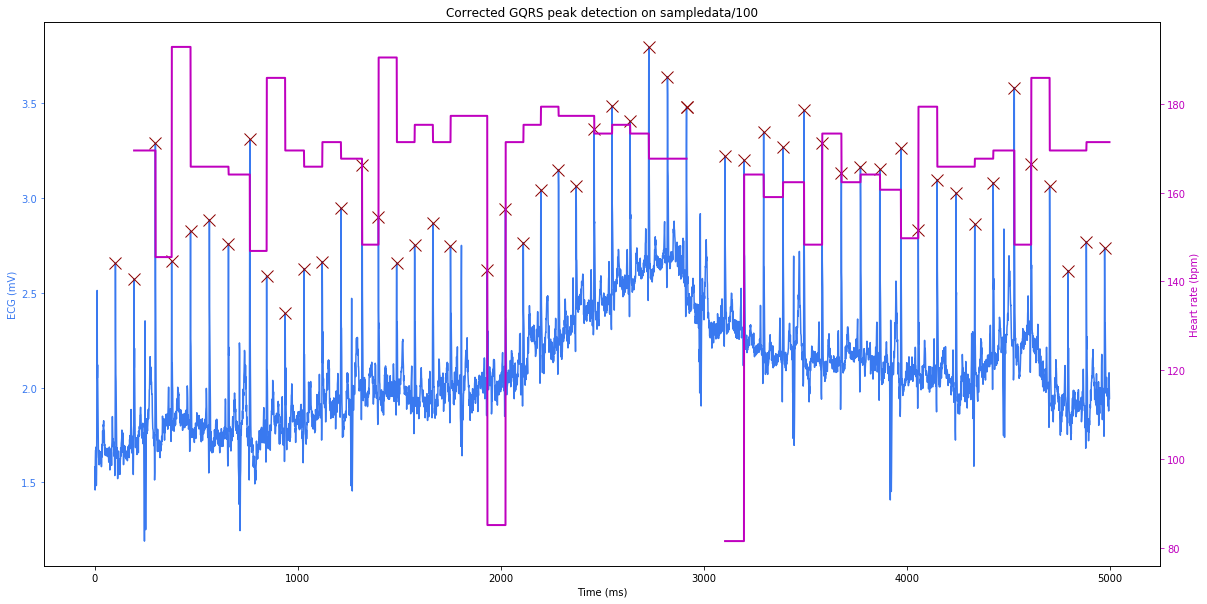

2 / 11 NORMAL
Corrected gqrs detected peak indices: [219, 336, 448, 555, 662, 808, 922, 1025, 1135, 1337, 1463, 1578, 1696, 1814, 1930, 2046, 2158, 2351, 2470, 2580, 2687, 2791, 2980, 3094, 3167, 3284, 3396, 3497, 3599, 3702, 3777, 3905, 4010, 4205, 4316, 4388, 4507, 4587, 4702, 4816, 4926]


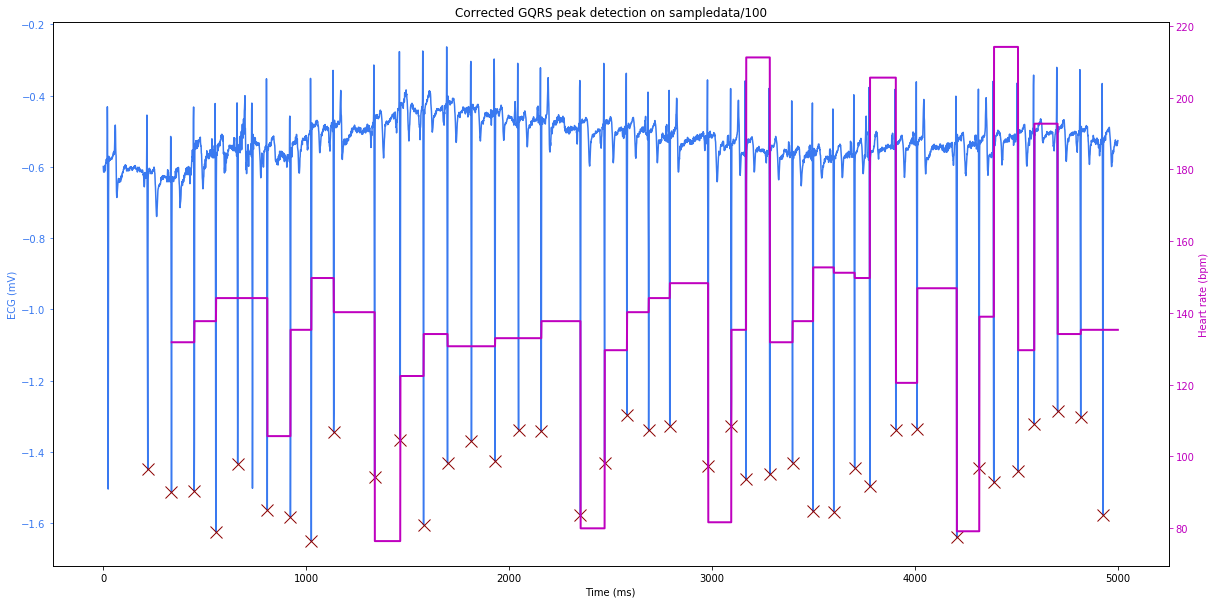

3 / 11 NORMAL
Corrected gqrs detected peak indices: [78, 183, 290, 397, 501, 574, 703, 816, 929, 1038, 1145, 1253, 1361, 1557, 1670, 1779, 1884, 1986, 2091, 2195, 2299, 2377, 2457, 2569, 2678, 2788, 2895, 3001, 3104, 3207, 3309, 3414, 3517, 3620, 3726, 3832, 3935, 4040, 4143, 4221, 4321, 4440, 4541, 4641, 4742, 4843, 4942]


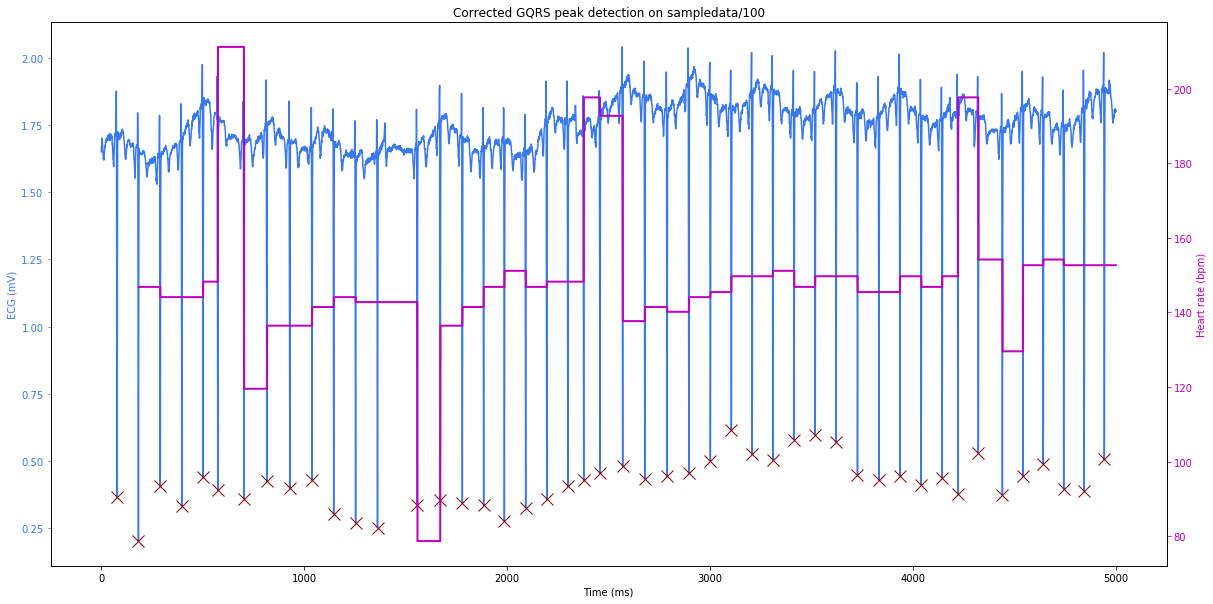

4 / 11 NORMAL
Corrected gqrs detected peak indices: [98, 251, 406, 484, 563, 716, 781, 881, 962, 962, 1042, 1267, 1421, 1498, 1577, 1649, 1734, 1813, 1969, 2107, 2197, 2276, 2356, 2436, 2516, 2601, 2685, 2772, 2857, 2944, 3032, 3119, 3208, 3298, 3387, 3477, 3566, 3655, 3744, 3833, 3920, 4007, 4093, 4177, 4263, 4347, 4432, 4516, 4599, 4684, 4771, 4859, 4945]


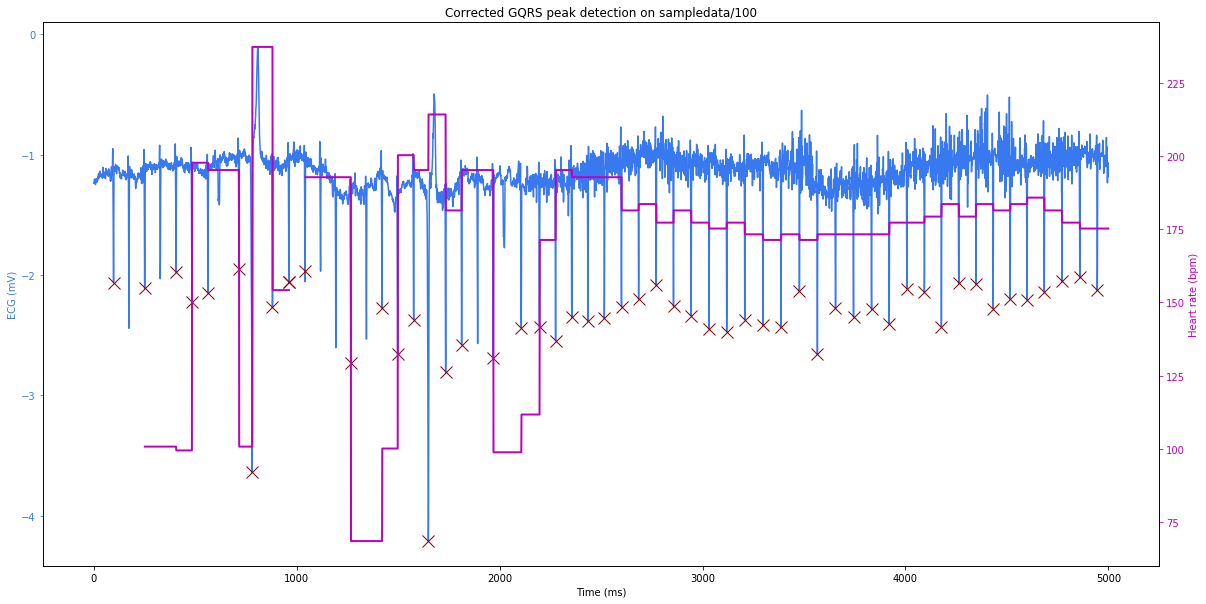

5 / 11 NORMAL
Corrected gqrs detected peak indices: [171, 344, 438, 511, 662, 662, 823, 921, 1029, 1103, 1293, 1478, 1650, 1818, 1901, 1974, 2053, 2205, 2403, 2597, 2775, 2946, 3111, 3194, 3339, 3519, 3694, 3869, 3975, 4040, 4134, 4206, 4368, 4456, 4545, 4637, 4735, 4836, 4925]


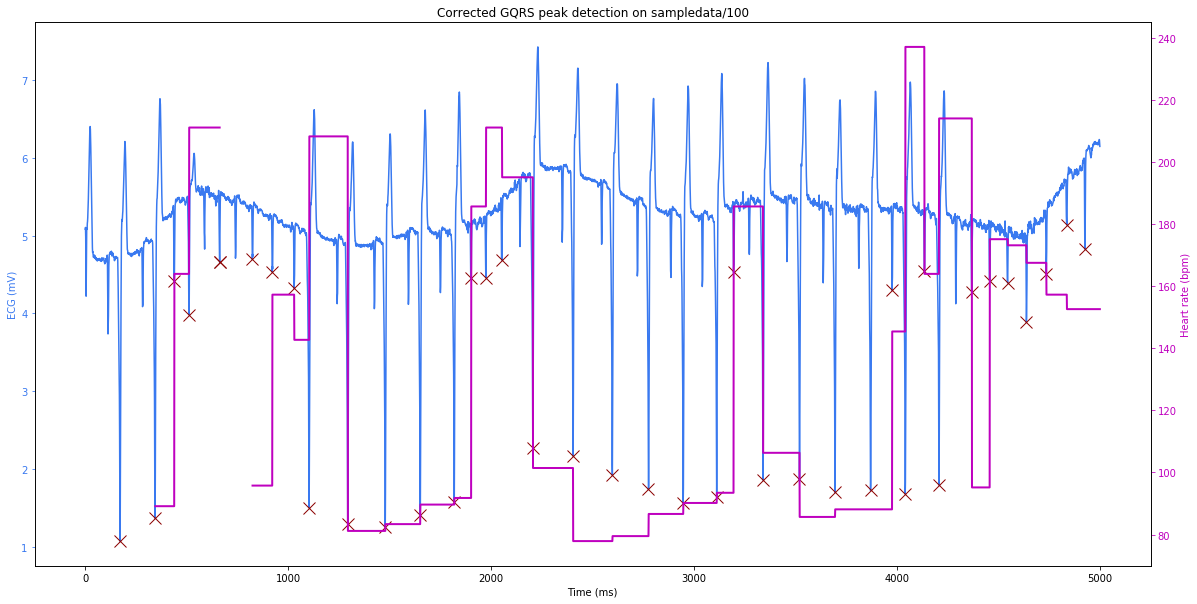

6 / 11 NORMAL
Corrected gqrs detected peak indices: [208, 306, 355, 501, 697, 842, 938, 1131, 1276, 1472, 1521, 1570, 1767, 1966, 2016, 2269, 2269, 2371, 2523, 2625, 2825, 2927, 3050, 3228, 3330, 3330, 3477, 3583, 3683, 3833, 3882, 3882, 4030, 4227, 4277, 4424, 4474, 4622, 4724, 4774, 4974]


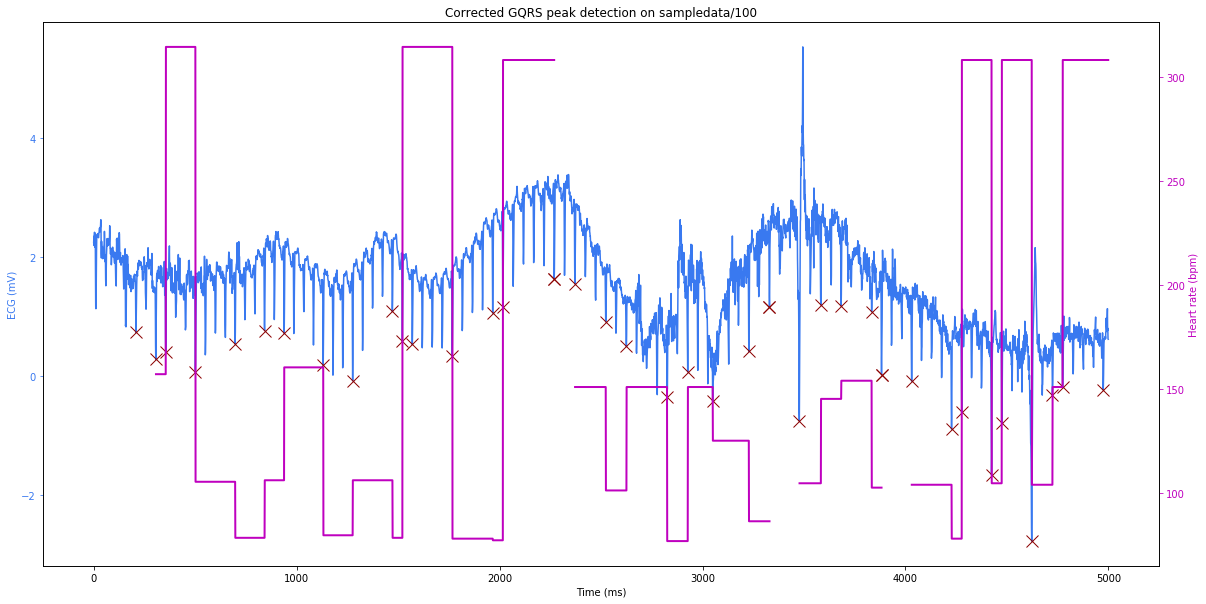

7 / 11 NORMAL
Corrected gqrs detected peak indices: [78, 172, 263, 353, 426, 547, 645, 743, 845, 922, 1122, 1333, 1469, 1541, 1656, 1745, 1832, 1909, 2008, 2097, 2187, 2267, 2402, 2473, 2681, 2823, 2890, 3019, 3094, 3203, 3294, 3384, 3537, 3670, 3766, 3863, 3959, 4055, 4154, 4323, 4455, 4519, 4652, 4748, 4839, 4931]


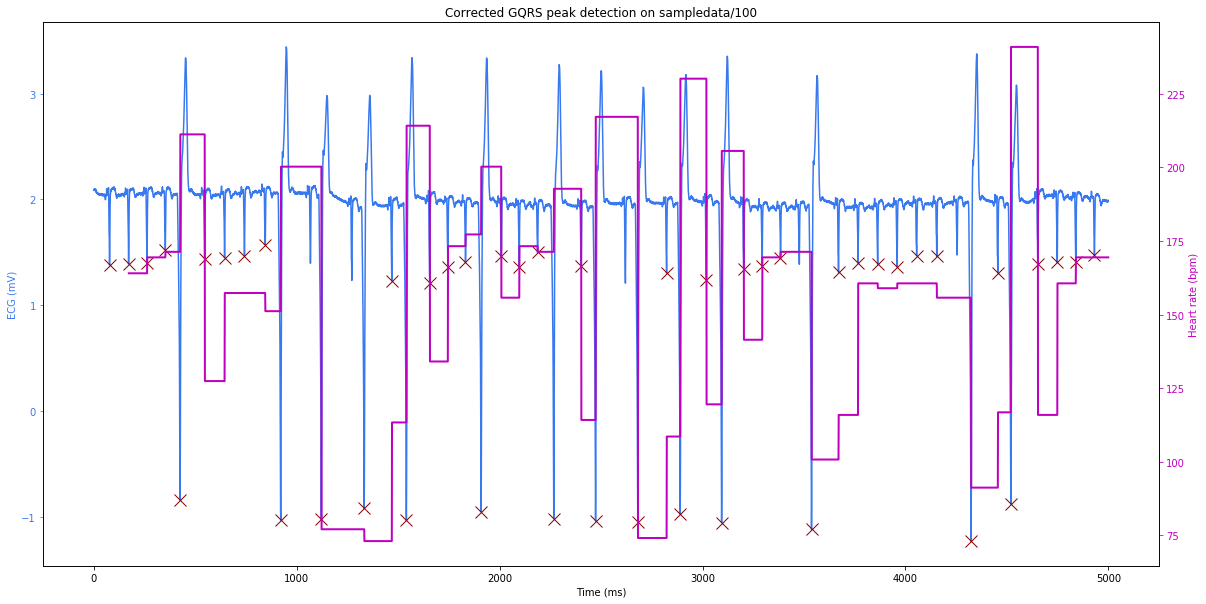

8 / 11 NORMAL
Corrected gqrs detected peak indices: [42, 273, 354, 558, 633, 719, 920, 1066, 1066, 1189, 1377, 1605, 1704, 1916, 2012, 2168, 2248, 2328, 2408, 2489, 2643, 2744, 2826, 2907, 2990, 3070, 3152, 3289, 3314, 3365, 3530, 3591, 3786, 3876, 3947, 4036, 4116, 4198, 4279, 4346, 4444, 4527, 4667, 4780, 4864, 4998]


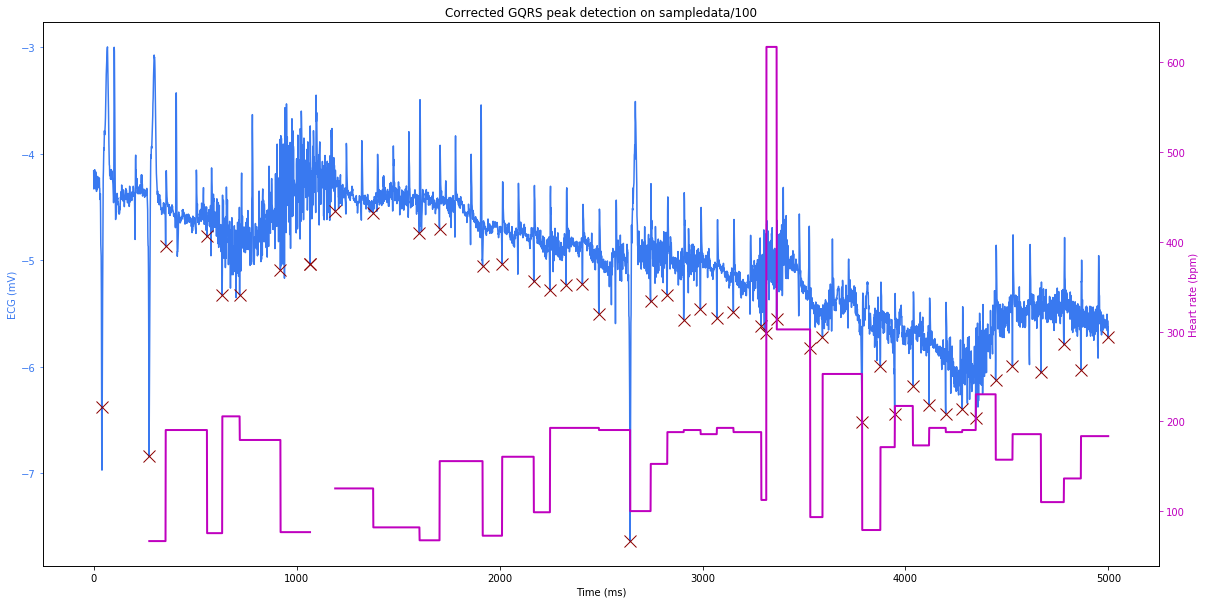

9 / 11 NORMAL
Corrected gqrs detected peak indices: [107, 208, 314, 427, 538, 650, 761, 872, 986, 1100, 1214, 1326, 1437, 1546, 1658, 1774, 1885, 1995, 2106, 2217, 2327, 2435, 2543, 2707, 2863, 2966, 3135, 3266, 3466, 3556, 3759, 3964, 4054, 4180, 4292, 4405, 4515, 4626, 4739, 4852]


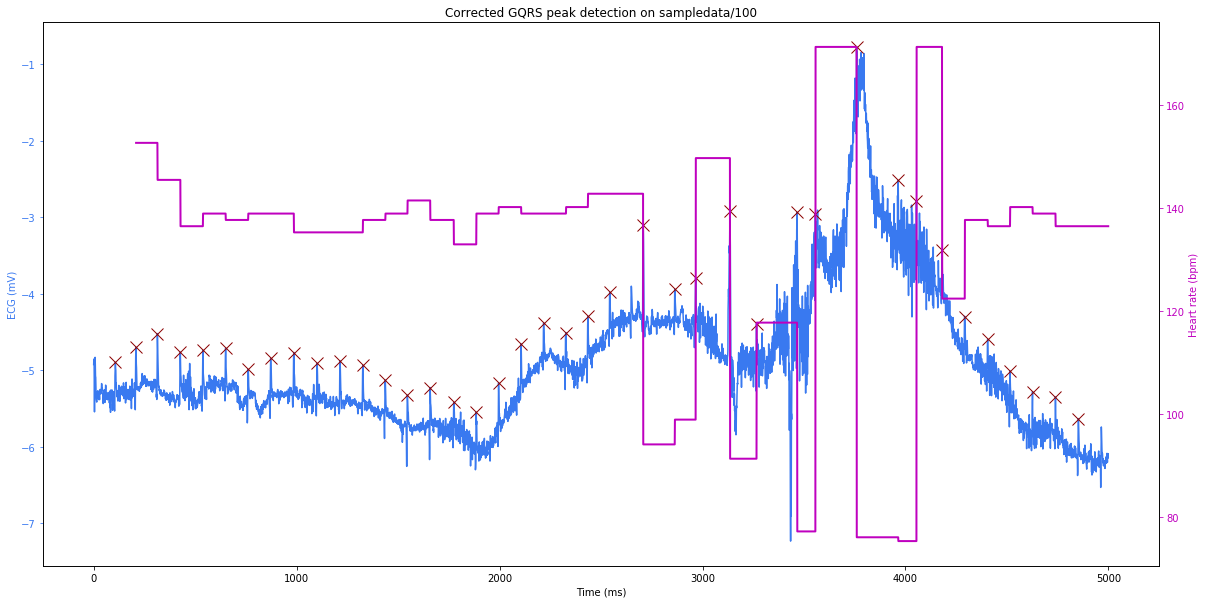

10 / 11 NORMAL
Corrected gqrs detected peak indices: [43, 276, 395, 552, 673, 829, 947, 1103, 1216, 1306, 1377, 1490, 1650, 1765, 1923, 2042, 2199, 2319, 2476, 2596, 2752, 2873, 2965, 3058, 3144, 3242, 3335, 3406, 3525, 3684, 3807, 3902, 3996, 4074, 4185, 4344, 4467, 4624, 4747, 4903]


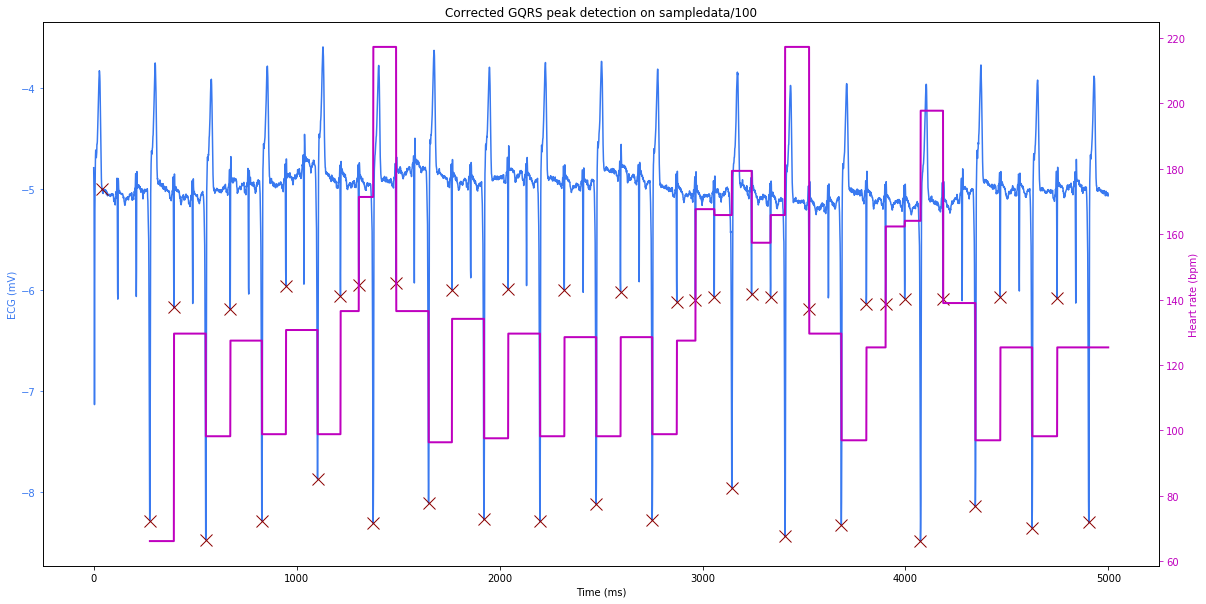

11 / 11 NORMAL
Corrected gqrs detected peak indices: [157, 225, 388, 507, 574, 740, 859, 928, 1096, 1214, 1282, 1448, 1568, 1635, 1795, 1911, 1979, 2135, 2249, 2320, 2475, 2587, 2657, 2810, 2923, 2995, 3152, 3265, 3335, 3498, 3617, 3686, 3852, 3975, 4043, 4212, 4335, 4402, 4571, 4691, 4759, 4925]


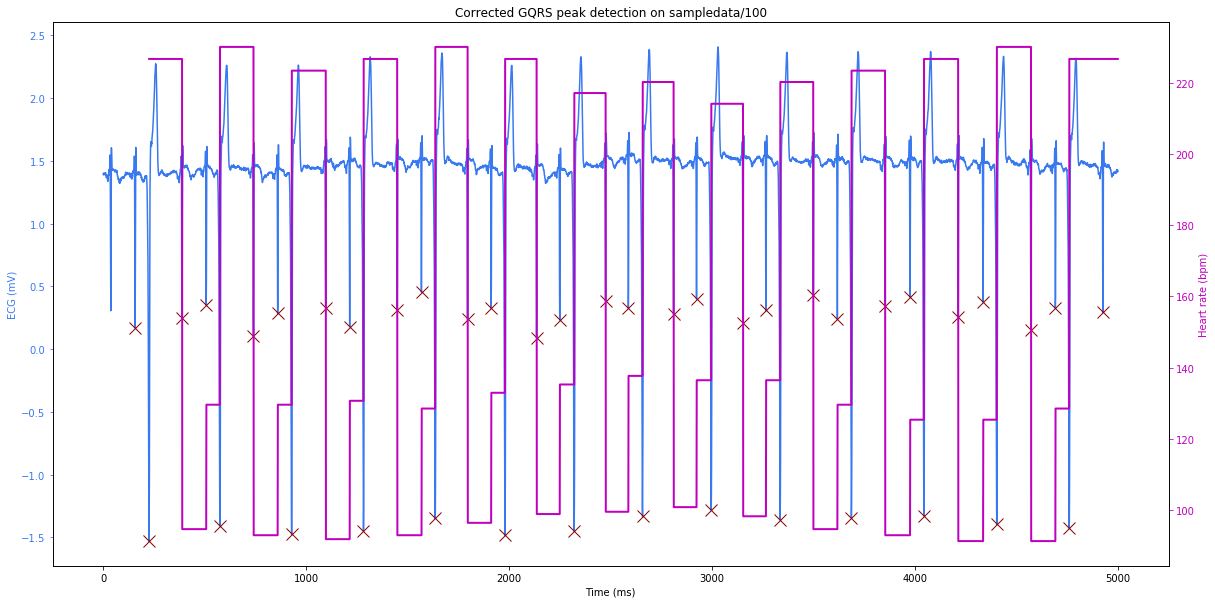

12 / 11 NORMAL
Corrected gqrs detected peak indices: [135, 243, 355, 456, 556, 631, 779, 889, 999, 1111, 1217, 1290, 1438, 1552, 1629, 1777, 1884, 1993, 2105, 2213, 2282, 2438, 2548, 2630, 2764, 2872, 2983, 3096, 3206, 3273, 3437, 3555, 3628, 3783, 3897, 3976, 4121, 4224, 4326, 4427, 4526, 4605, 4739, 4843, 4947]


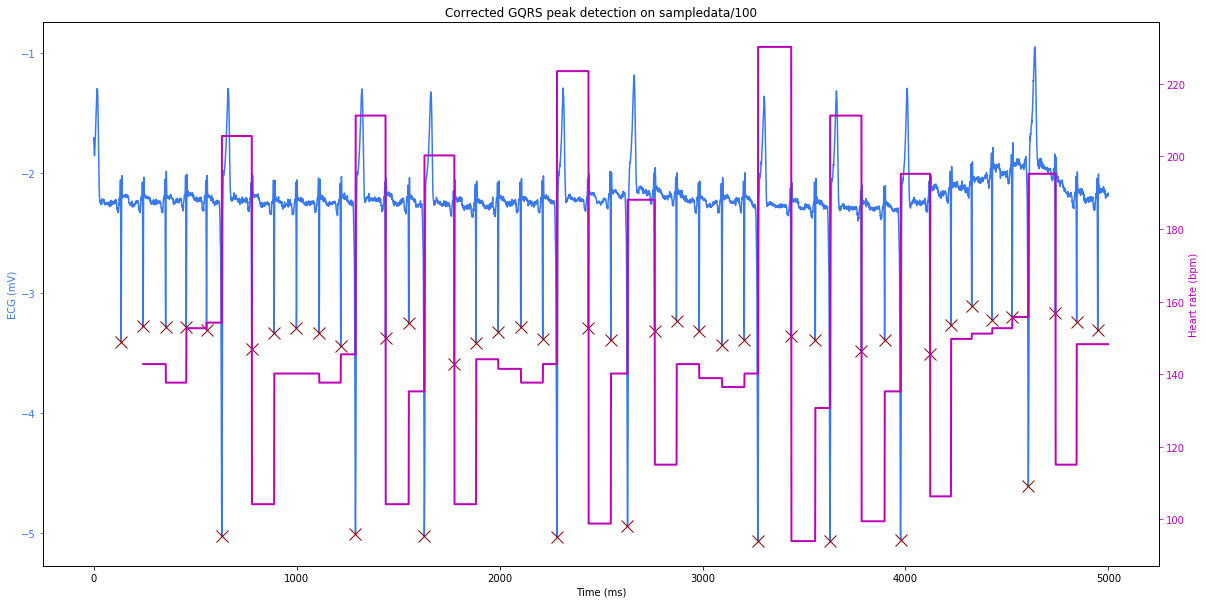

13 / 11 NORMAL
Corrected gqrs detected peak indices: [409, 1042, 1370, 1529, 2244, 2487, 2693, 2790, 2790, 3172, 3495, 3676, 3785, 3983, 4309, 4516, 4727, 4810, 4951, 4998]


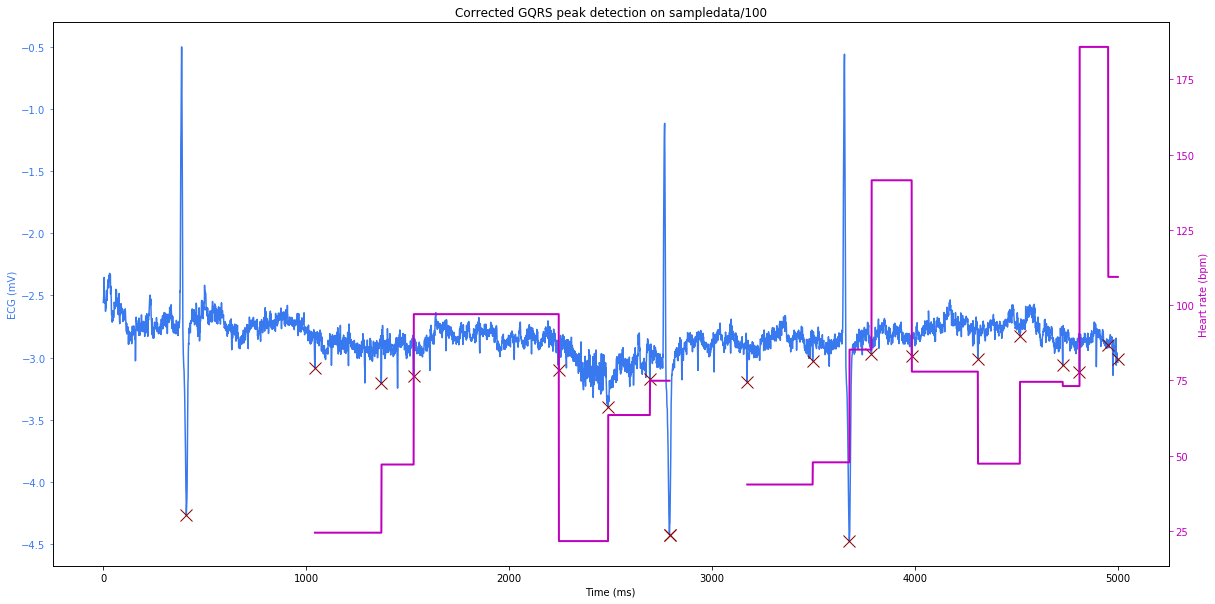

14 / 11 NORMAL
Corrected gqrs detected peak indices: [783, 1107, 1527, 1767, 2076, 2252, 2493, 2669, 2911, 3117, 3359, 3449, 3609, 3705, 3875, 4112, 4289, 4426, 4599, 4805]


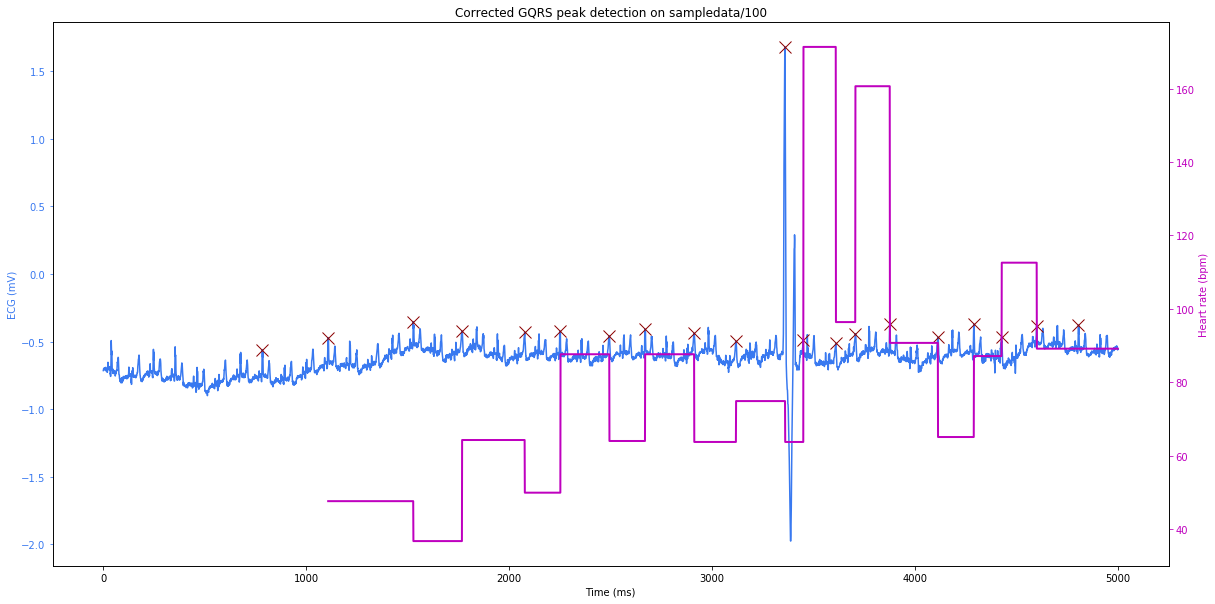

15 / 11 NORMAL
Corrected gqrs detected peak indices: [185, 298, 396, 491, 587, 682, 871, 967, 1062, 1156, 1156, 1346, 1421, 1617, 1724, 1818, 1912, 2004, 2099, 2292, 2388, 2486, 2584, 2684, 2785, 2887, 2990, 2990, 3196, 3296, 3397, 3497, 3687, 3807, 3909, 4012, 4115, 4217, 4320, 4421, 4421, 4626, 4726, 4827, 4992]


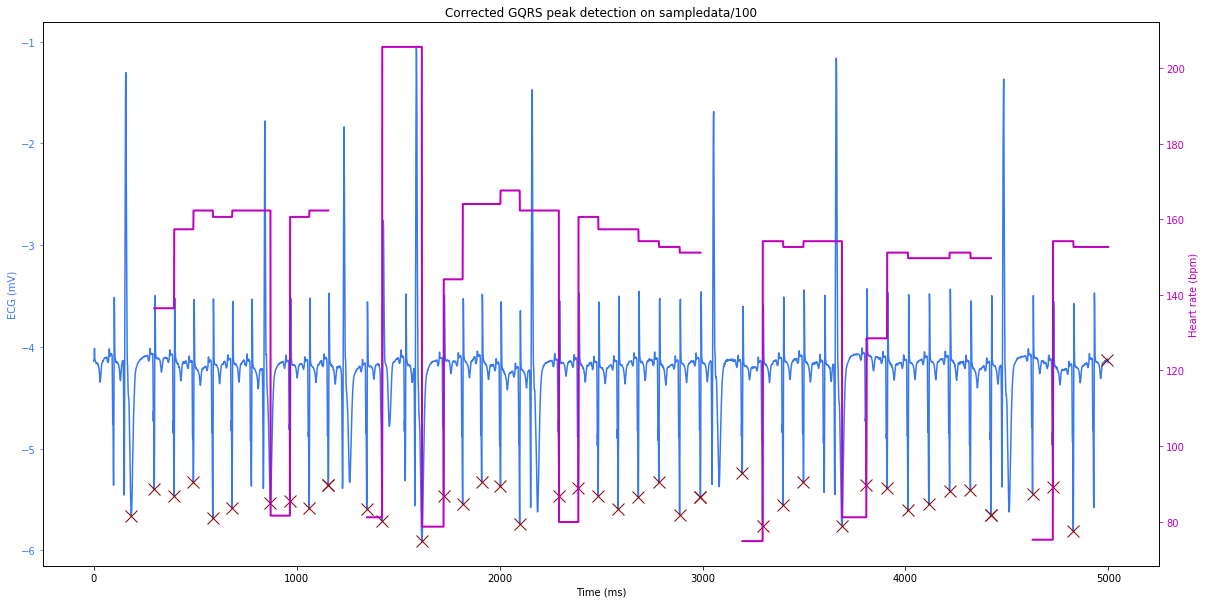

16 / 11 NORMAL
Corrected gqrs detected peak indices: [63, 185, 300, 416, 531, 645, 758, 872, 984, 1096, 1207, 1318, 1430, 1540, 1650, 1760, 1870, 1981, 2092, 2092, 2313, 2424, 2535, 2647, 2760, 2873, 2988, 3103, 3219, 3333, 3448, 3563, 3677, 3790, 3906, 4023, 4140, 4254, 4369, 4484, 4597, 4712, 4826, 4937]


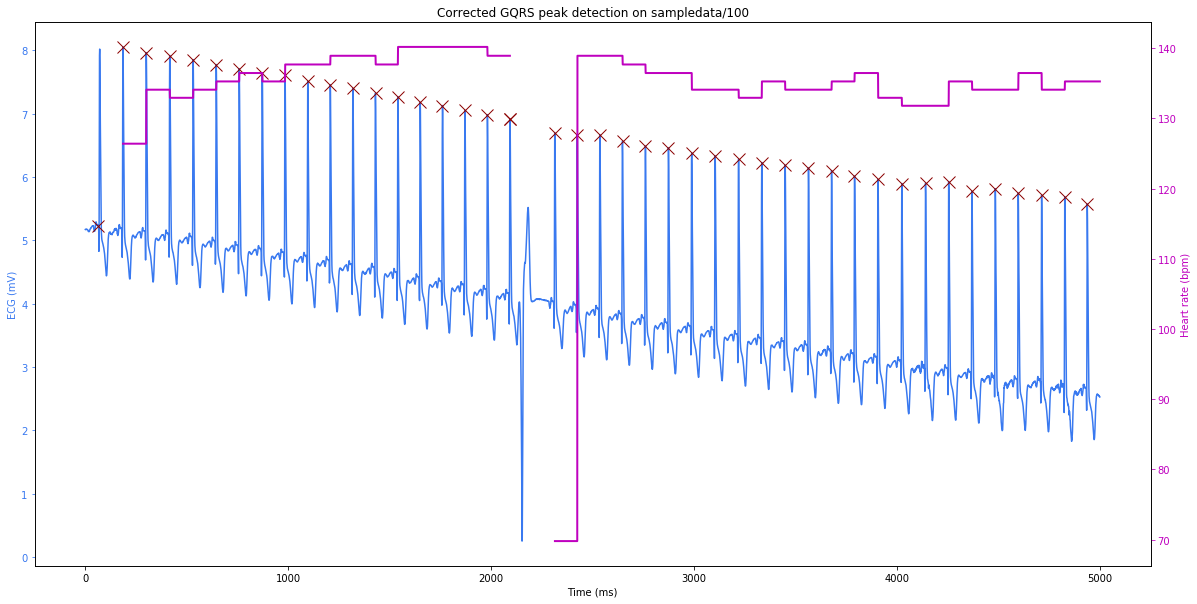

In [94]:
MI_beat.clear()
for i, data in enumerate(records):
#     if i == 75:
        print (str(i) + " / " + str(len(data)) + " NORMAL")
        record = wfdb.rdrecord(data)

        data = record.p_signal
        channel = data[:, 4]

        cA , cD = pywt.dwt(channel,db6)
        wavel = cA

        qrs_inds = processing.gqrs_detect(sig=wavel[ : howmany], fs=record.fs)

        # FIND PEAK SIGNAL ECG
        search_radius = int(record.fs * 60 / max_bpm)
        if len(qrs_inds) != 0:
            corrected_peak_inds = processing.correct_peaks(wavel[ : howmany], peak_inds=qrs_inds,
                                                   search_radius=search_radius, smooth_window_size=150)
        # Display results
        print('Corrected gqrs detected peak indices:', sorted(corrected_peak_inds))
        peaks_hr(sig=wavel[ : howmany], peak_inds=sorted(corrected_peak_inds), fs=record.fs,
                 title="Corrected GQRS peak detection on sampledata/100")
        for i, peak in enumerate(sorted(corrected_peak_inds)):
            if (peak-100) < 0 or (peak+150) > 5000:
                continue
            else:
                MI_beat.append(wavel[peak-100:peak+151])
#     else:
#         continue

In [88]:
CAD_beat_np = np.array(MI_beat)

In [89]:
CAD_beat_np.shape

(687, 251)

## DCT Process

In [90]:
dct_signal = dct(CAD_beat_np)

## ECG to CSV

In [91]:
dct_pandas = pd.DataFrame(data=dct_signal)

In [92]:
dct_pandas.to_csv('dct_CAD.csv')

## Classification

In [95]:
df_normal = pd.read_csv('dct_NORMAL.csv')
df_CAD = pd.read_csv('dct_CAD.csv')
df_MI = pd.read_csv('dct_MI.csv')

In [101]:
print(df_CAD.shape)
print(df_normal.shape)
print(df_MI.shape)

(687, 252)
(716, 252)
(459, 252)


In [111]:
df_normal['class'] = 'normal'
df_MI['class'] = 'MI'
df_CAD['class'] = 'CAD'

In [112]:
df_total = pd.DataFrame()

In [113]:
df_total = df_total.append(df_normal)

In [114]:
df_total = df_total.append(df_MI)

In [115]:
df_total = df_total.append(df_CAD)

In [116]:
df_total.shape

(1862, 253)

In [152]:
df_total.tail()

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,class
274,839.755871,35.718032,2.637750,39.411693,24.395684,-2.901869,-4.096863,7.639376,-17.720792,27.632938,...,-1.214241,0.061380,1.605236,-0.610292,-1.396274,0.530984,0.281588,-0.596484,0.716685,CAD
509,745.610213,-18.393752,-9.743122,34.794084,18.001359,-41.585065,-37.994016,40.571610,56.384004,-12.209807,...,0.155617,0.036274,0.054339,-0.011201,0.183921,-0.030574,0.091119,0.046653,0.009438,CAD
83,1151.111360,26.541557,1.781948,2.517750,-1.320398,13.565949,0.910157,-4.497317,2.184076,-3.878131,...,-0.247312,-0.515730,0.903467,0.363958,-0.108633,0.314142,-0.154693,0.401712,-0.308148,CAD
502,-329.781192,50.027556,-50.991473,-45.130558,29.982602,33.445130,14.271702,-51.470100,-22.375537,19.153845,...,-0.034381,0.007529,0.070391,0.004771,-0.067915,-0.064569,-0.020453,0.066228,0.054062,normal
23,1086.298430,-10.992582,-7.350042,-0.483379,1.202129,19.186688,2.438569,-4.368533,0.175598,-1.412608,...,0.796882,0.266521,0.569392,2.371567,0.398660,-0.861855,0.124968,0.189609,1.171749,CAD


In [119]:
df_total.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [132]:
df_total = df_total.sample(frac=1)

In [133]:
X = df_total.loc[:, df_total.columns!= 'class']
y = df_total['class']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [136]:
pca = PCA(n_components=33, random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=33, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [137]:
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

In [141]:
clf = SVC(kernel='linear')
clf.fit(X_t_train, y_train)
print ('score', clf.score(X_t_test, y_test))
#print ('pred label', clf.predict(X_t_test))

score 0.9373881932021467


In [143]:
y_pred = clf.predict(X_t_test)

In [149]:
target_names = ['normal', 'MI', 'CAD']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.99      0.94      0.97       206
          MI       0.92      0.88      0.90       135
         CAD       0.90      0.97      0.93       218

   micro avg       0.94      0.94      0.94       559
   macro avg       0.94      0.93      0.93       559
weighted avg       0.94      0.94      0.94       559



In [151]:
confusion_matrix(y_test, y_pred)

array([[193,   5,   8],
       [  0, 119,  16],
       [  1,   5, 212]])